# Titanic: Machine Learning from Disaster

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.



## Goal

In this assignment, you will be asked to find insights from the data by using **pandas** to analyze and manipulate the data and **matplotlib** and **seaborn** for data visualization. You will get a bonus point if you can apply a logistic regression model to predict which passengers are more likely to survive in a separate test set. 

In [56]:
# importing libraries
import os
import io
import warnings

import numpy as np
import scipy as sp
import pandas as pd
import sklearn as sk

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

warnings.simplefilter(action='ignore', category=FutureWarning)

In [57]:
# load data
titanic = pd.read_csv('https://raw.githubusercontent.com/zariable/data/master/titanic_train.csv')
display(titanic.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Description of the data set
Here's a brief description of each column in the data.

- PassengerID: A column added by Kaggle to identify each row and make submissions easier
- Survived: Whether the passenger survived or not and the value we are predicting (0=No, 1=Yes)
- Pclass: The class of the ticket the passenger purchased (1=1st, 2=2nd, 3=3rd)
- Sex: The passenger's sex
- Age: The passenger's age in years
- SibSp: The number of siblings or spouses the passenger had aboard the Titanic
- Parch: The number of parents or children the passenger had aboard the Titanic
- Ticket: The passenger's ticket number
- Fare: The fare the passenger paid
- Cabin: The passenger's cabin number
- Embarked: The port where the passenger embarked (C=Cherbourg, Q=Queenstown, S=Southampton)

In [58]:
titanic.describe(include='all')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### **Find the number of missing values for each column.**
The first step in data analysis is to identify columns with missing data. Can you find the columns in this data with missing value as well as the number of records with missing value for each column?  

Hint: you will need [isna](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.isna.html) function.

In [59]:
titanic.isna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [60]:
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### **Impute missing values.**
Now we've identified the following columns with missing values: _Age_, _Cabin_ and _Embarked_. As the next step, we want to impute those missing values. There are three ways to impute the missing values:
- A constant value that has meaning within the domain.
- The mean, median or mode value based on non-missing values of that column.
- A random value drawn from other non-missing values of that column.

Please write code to impute the missing values as follows:
- the missing values of column _age_ with the mean of that column.
- the missing values of column _Cabin_ with a constant value 'other'.
- the missing values of column _Embarked_ with the [mode](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.mode.html) of that column.

In [61]:
#Impute the missing value 
#Impute the missing values of column Age with the mean of that column
titanic['Age'].fillna(titanic['Age'].mean(), inplace = True)
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [62]:
#Impute the missing value 
#Impute the missing values of column Cabin with a constant value 'other'
titanic['Cabin']
titanic['Cabin'].fillna('other', inplace = True)
titanic.isna().sum()

titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,other,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,other,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,other,S


In [63]:
titanic.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
dtype: int64

In [64]:
titanic['Embarked'].mode()

0    S
Name: Embarked, dtype: object

In [65]:
#Impute the missing value 
#Impute the missing values of column Embarked with the mode of that column
titanic['Embarked'] = titanic['Embarked'].fillna(titanic['Embarked'].mode()[0])
titanic.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

### **What's the name of the person who has the 16th most expensive ticket?**

In [66]:
titanic.nlargest(16, ['Fare'])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.000000,0,0,PC 17755,512.3292,other,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.000000,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.000000,0,0,PC 17755,512.3292,B101,C
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.000000,3,2,19950,263.0000,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.000000,3,2,19950,263.0000,C23 C25 C27,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.000000,3,2,19950,263.0000,C23 C25 C27,S
438,439,0,1,"Fortune, Mr. Mark",male,64.000000,1,4,19950,263.0000,C23 C25 C27,S
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.000000,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
742,743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.000000,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.000000,0,1,PC 17558,247.5208,B58 B60,C


In [67]:
#The name of the person who has the 16th most expensive ticket
titanic2 = titanic.sort_values('Fare', ascending=False)
titanic2.head(16)

titanic2['Name'].iloc[15]

'Farthing, Mr. John'

Farthing, Mr. John is the name of person who has the 16th most expensive ticket.

### **Out of all the females who survived, what's the name who has the 6th most expensive ticket?**

In [68]:
femalesurvived = titanic[(titanic.Sex == 'female') & (titanic.Survived == 1)]
femalesurvived.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,other,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,other,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,other,C


In [69]:
female_survived_byfare = femalesurvived.sort_values('Fare', ascending=False)
female_survived_byfare.head(6)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,other,C
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S
742,743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
299,300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C


In [70]:
#Female who survived and has the 6th most expensive ticket
female_survived_byfare['Name'].iloc[5]

'Baxter, Mrs. James (Helene DeLaudeniere Chaput)'

'Baxter, Mrs. James is the female that survived and had the 6th most expensive ticket.

### **Examine the survival rate**
Calculate the survival rate for different gender and Pclass combination and use a couple of sentences to describe your findings. Hint: pivot_table is your friend.

In [71]:
#Calculate the survival rate using pivot table aggregates by taking the mean across Sex
pivot_titanic = pd.pivot_table(titanic, values= ['Survived'], index = ['Sex', 'Pclass'])

In [72]:
pivot_titanic

Survived
Sex    Pclass          
female 1       0.968085
       2       0.921053
       3       0.500000
male   1       0.368852
       2       0.157407
       3       0.135447

From the above finding, we can say that female passengers had a better survival rate as compared to male passengers. 
Also, passengers of Pclass 1 and 2 had better survival rate as compared to passengers of Pclass 3.

### **Is Age or Fare an important factor to one's chance of survival?**
Visualize the distribution of Column _Age_ for both survived and non-survived population and write down your findings based on the visualization.

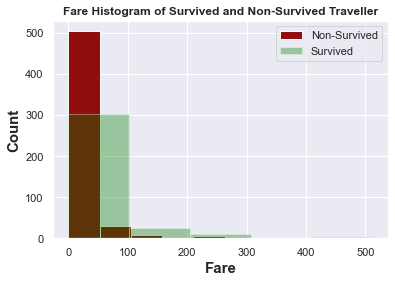

In [73]:
#Visualize the distribution of Fare for both survived and non-survived population
plt.hist(titanic[titanic["Survived"] == 0]['Fare'], bins=5, alpha=0.95, color='darkred')
plt.hist(titanic[titanic["Survived"] == 1]['Fare'], bins=5, alpha=0.35, color='green')
  
plt.title("Fare Histogram of Survived and Non-Survived Traveller", fontweight="bold")
plt.legend(['Non-Survived', 
            'Survived'])
plt.xlabel("Fare", fontsize = 15, fontweight="bold")
plt.ylabel("Count", fontsize = 15, fontweight="bold")
plt.show()

From above graphs we can say that passengers who paid less on fare is less likely to survive as compared to who paid higher on fare due to non-accessbility of lifeboat. 

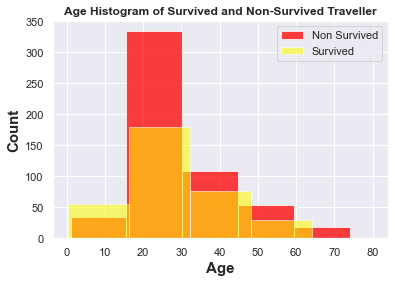

In [74]:
#Visualize the distribution of Age for both survived and non-survived population
plt.hist(titanic[titanic["Survived"] == 0]['Age'], bins=5, alpha=0.75, color='red')
plt.hist(titanic[titanic["Survived"] == 1]['Age'], bins=5, alpha=0.55, color='yellow')
  
plt.title("Age Histogram of Survived and Non-Survived Traveller", fontweight="bold")
plt.legend(['Non Survived', 
            'Survived'])
plt.xlabel("Age", fontsize = 15, fontweight="bold")
plt.ylabel("Count", fontsize = 15, fontweight="bold")
plt.show()

From the above graph, we can say that distribution of ages for both survivored and non-survivored is quite similar, however, a noticeable distinction is that a higher percentage of  survived passenger belongs to 0 to 30 years of age. This observation suggests that passenger of age range of 0 to 30 years were most likely able to access lifeboat and survived.
So, finally we can say that Fare is important factor to one's survival not the age.

### **Calculate and visualize the survival rate for discrete columns**
- Calculate the survival rate for column _SibSp_ and _Parch_.
- Use sns.barplot to visualize the survival rate for column _SibSp_ and _Parch_.

In [116]:
# Calculate the survival rate for SibSp
sibsp_counts = titanic.groupby('SibSp')['Survived'].count()
sibsp_survived = titanic.groupby('SibSp')['Survived'].sum()
sibsp_survival_rate_SibSp = sibsp_survived / sibsp_counts
sibsp_survival_rate_SibSp*100


SibSp
0    34.539474
1    53.588517
2    46.428571
3    25.000000
4    16.666667
5     0.000000
8     0.000000
Name: Survived, dtype: float64

In [117]:
# Calculate the survival rate for Parch
parch_counts = titanic.groupby('Parch')['Survived'].count()
parch_survived = titanic.groupby('Parch')['Survived'].sum()
parch_survival_rate_Parch = parch_survived / parch_counts
parch_survival_rate_Parch*100

Parch
0    34.365782
1    55.084746
2    50.000000
3    60.000000
4     0.000000
5    20.000000
6     0.000000
Name: Survived, dtype: float64

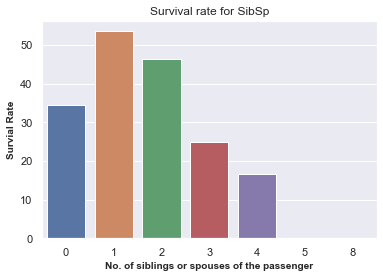

In [118]:
# SibSp survival rate
sns.barplot(x=sibsp_survival_rate_SibSp.index, y=sibsp_survival_rate_SibSp.values*100)
plt.xlabel('No. of siblings or spouses of the passenger', size=10, weight=900)
plt.ylabel('Survial Rate', size=10, weight=900)
plt.title("Survival rate for SibSp")
plt.show()

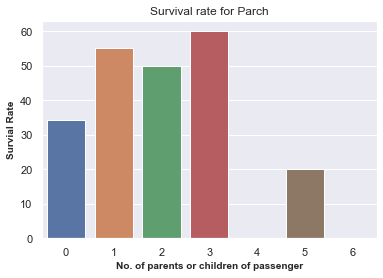

In [119]:
# Parch survival rate
sns.barplot(x=parch_survival_rate_Parch.index, y=parch_survival_rate_Parch.values*100)
plt.xlabel('No. of parents or children of passenger', size=10, weight=900)
plt.ylabel('Survial Rate', size=10, weight=900)
plt.title("Survival rate for Parch")
plt.show()

### **Question 8: Find the correlations.**
Find the correlations between the feature and the target variable _Survived_ and use heatmap to visualize it. Summarize your findings.

In [79]:
titanic['Embarked']=titanic['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
titanic['Sex'] = titanic['Sex'].map({'male': 0, 'female': 1})
corr = titanic.corr()
corr

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,-0.005007,-0.035144,-0.042939,0.033207,-0.057527,-0.001652,0.012658,-0.030467
Survived,-0.005007,1.000000,-0.338481,0.543351,-0.069809,-0.035322,0.081629,0.257307,0.106811
Pclass,-0.035144,-0.338481,1.000000,-0.131900,-0.331339,0.083081,0.018443,-0.549500,0.045702
Sex,-0.042939,0.543351,-0.131900,1.000000,-0.084153,0.114631,0.245489,0.182333,0.116569
Age,0.033207,-0.069809,-0.331339,-0.084153,1.000000,-0.232625,-0.179191,0.091566,0.007461
SibSp,-0.057527,-0.035322,0.083081,0.114631,-0.232625,1.000000,0.414838,0.159651,-0.059961
Parch,-0.001652,0.081629,0.018443,0.245489,-0.179191,0.414838,1.000000,0.216225,-0.078665
Fare,0.012658,0.257307,-0.549500,0.182333,0.091566,0.159651,0.216225,1.000000,0.062142
Embarked,-0.030467,0.106811,0.045702,0.116569,0.007461,-0.059961,-0.078665,0.062142,1.000000


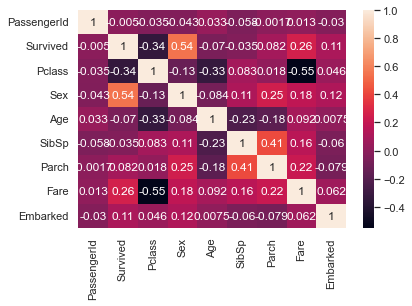

In [80]:
# Generate heatmap to show the correlations between each attribute and target variable Survived
sns.heatmap(corr, annot=True)
plt.show()

According to the above heatmap we can say that Sex and Fare are the features that are positively correlated to the survival of passengers. These are important factors to one's chance of survival.

### **Any other insights do you draw by analyzing the data? Summarize the findings as well as provide the code leading you to the findings.**

In [121]:
# Calculate the survival rate for Pclass
pclass_counts = titanic.groupby('Pclass')['Survived'].count()
pclass_survived = titanic.groupby('Pclass')['Survived'].sum()
pclass_survival_rate = pclass_survived / pclass_counts
pclass_survival_rate*100

Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64

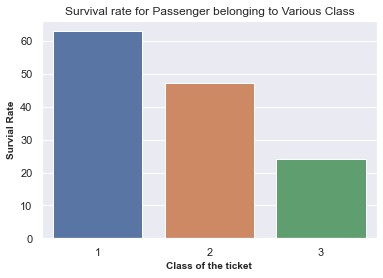

In [120]:
# Pclass survival rate
sns.barplot(x = pclass_survival_rate.index, y = pclass_survival_rate.values*100)
plt.xlabel('Class of the ticket', size=10, weight=900)
plt.ylabel('Survial Rate', size=10, weight=900)
plt.title("Survival rate for Passenger belonging to Various Class")
plt.show()

So from above graph we can say that the survival rate of passenger with 1st class ticket is higher as compared to that of 2nd and 3rd class. Also,survival rate of passenger with 2nd class ticket is higher as compared to that of 3rd class. Therefore, we can assume that the lifeboat was easily accessible to people belongiing to 1st and 2nd class passesnger as their survival rate is higher.

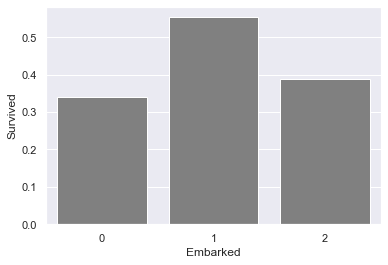

In [83]:
#Calculate the survival rate for Embarked 
sns.barplot('Embarked', 'Survived', data= titanic, color="grey", ci = None)
plt.show()

From above graph, we can say that the passenger that boarded the ship from Southhampton were less likely to survive as compared to from Queentown or Cherbourg.


### **Bonus Point: Build a ML model to predict survival.**
Can you build a logistic regression model to predict the probability of survival for all the passengers in this [file](https://raw.githubusercontent.com/zariable/data/master/titanic_test.csv)? You can evaluate your model accuracy on [Kaggle](https://www.kaggle.com/c/titanic). Can you think of any other ways to improve the model performance? Implement your idea to see if it actually works. 

In [84]:
#Bulid logistic regression model
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score

#logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [85]:
train_titanic = pd.read_csv('https://raw.githubusercontent.com/zariable/data/master/titanic_train.csv')
test_titanic = pd.read_csv('https://raw.githubusercontent.com/zariable/data/master/titanic_test.csv')
result_df = pd.read_csv("real.csv")

In [86]:
relevant_features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

In [87]:
train_titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [88]:
test_titanic

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [89]:
#Identify most relevant features
relevant_features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']

#Check the missing value for test
test_titanic.isna().sum()

#Check the missing value for test
train_titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [90]:
#Adding missing in Age in test dataframe
test_titanic['Age'].fillna(test_titanic['Age'].mean(), inplace = True)
test_titanic.isna().sum()

#Adding missing in Age in train dataframe
train_titanic['Age'].fillna(train_titanic['Age'].mean(), inplace = True)
train_titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [91]:
#Adding missing in Cabin in test dataframe
test_titanic['Cabin']
test_titanic['Cabin'].fillna('other', inplace = True)
test_titanic.isna().sum()


PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin          0
Embarked       0
dtype: int64

In [92]:
#Adding missing in Cabin in train dataframe
train_titanic['Cabin']
train_titanic['Cabin'].fillna('other', inplace = True)
train_titanic.isna().sum()

train_titanic.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
dtype: int64

In [93]:
#Adding missing in Embraked of training dataframe
train_titanic['Embarked'] = train_titanic['Embarked'].fillna(train_titanic['Embarked'].mode()[0])
train_titanic.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [94]:
##Adding missing in Cabin in test dataframe
test_titanic['Fare'] = test_titanic['Fare'].fillna(test_titanic['Fare'].mode()[0])
test_titanic.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [95]:
# Encode categorical variables as numeric
train_titanic['Sex'] = train_titanic['Sex'].map({'male': 0, 'female': 1})
test_titanic['Sex'] = test_titanic['Sex'].map({'male': 0, 'female': 1})
train_titanic['Embarked'] = train_titanic['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
test_titanic['Embarked'] = test_titanic['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})


In [96]:
test_titanic.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,other,2
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,other,0
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,other,2
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,other,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,other,0


In [97]:
#scaler = StandardScaler()
#train_titanic[relevant_features] = scaler.fit_transform(train_titanic[relevant_features])
#test_titanic[relevant_features] = scaler.transform(test_titanic[relevant_features])


In [98]:
X_train = train_titanic[relevant_features]
y_train = train_titanic['Survived']
X_test = test_titanic[relevant_features]

In [99]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=33)



In [101]:
#Train the model
log_reg = LogisticRegression()
model = VotingClassifier(estimators=[('lr', log_reg)])
model.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression())])

In [102]:
#model = VotingClassifier(estimators=[('lr', best_log_reg)])
model.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression())])

In [103]:
# Evaluate the fine-tuned model
y_pred = model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print("Accuracy: ", accuracy)

Accuracy:  0.8100558659217877


In [104]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [106]:
# Save the predictions to a CSV file
output = pd.DataFrame({'PassengerId': test_titanic['PassengerId'], 'Survived': y_pred})
output.to_csv('submission.csv', index=False)

In [107]:
# print(output)
print('Correlation with ideal submission:', output['Survived'].corr(result_df['Survived']))
result_df['percent'] = result_df['Survived'] == output['Survived']

Correlation with ideal submission: 0.8805765691737529


In [108]:
print('percent: \n', (result_df['percent'].value_counts('True')))

percent: 
 True     0.944976
False    0.055024
Name: percent, dtype: float64


Current logistic regression model's accuracy is 80.41% and we can improve the 
accuracy by implementing Grid search and removing the Embark attribute (as the data is skewed at the left) to find the best confriguration for the hyper-parameters used in the model.

### Improving the Model


In [109]:
relevant_features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
X_train = train_titanic[relevant_features]
y_train = train_titanic['Survived']
X_test = test_titanic[relevant_features]
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=33)
model = VotingClassifier(estimators=[('lr', log_reg)])
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
grid_search = GridSearchCV(log_reg, param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_log_reg = grid_search.best_estimator_
print("Best parameters for logistic regression: ", grid_search.best_params_)

Best parameters for logistic regression:  {'C': 10}


In [111]:
model = VotingClassifier(estimators=[('lr', best_log_reg)])
model.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(C=10))])

In [115]:
y_pred = model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print("Accuracy: ", accuracy)

# Evaluate the logistic regression classifier
scores = cross_val_score(log_reg, X_train, y_train, cv=5)
print("Accuracy of logistic regression classifier: ", scores.mean())


# Make predictions on the test set
y_pred = model.predict(X_test)

# Save the predictions to a CSV file
output = pd.DataFrame({'PassengerId': test_titanic['PassengerId'], 'Survived': y_pred})
output.to_csv('submission.csv', index=False)

# print(output)
print('Correlation with ideal submission:', output['Survived'].corr(result_df['Survived']))
result_df['percent'] = result_df['Survived'] == output['Survived']
print('percent: \n', (result_df['percent'].value_counts('True')))

Accuracy:  0.8100558659217877
Accuracy of logistic regression classifier:  0.792140254112085
Correlation with ideal submission: 0.8805765691737529
percent: 
 True     0.944976
False    0.055024
Name: percent, dtype: float64


By removing the Embarked attributes, the accuracy of the model slightly increased to 81.00% as compared to the previous model where it was 80.41%. 
